# **FMCG Demand Forecasting**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# **Uplaod the sales data**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving FMCG_Sales_Data.csv to FMCG_Sales_Data.csv


In [3]:
from datetime import date
df=pd.read_csv('FMCG_Sales_Data.csv',parse_dates=['Date'])

In [4]:
df.head()

,Date,Store_ID,Product_ID,Category,Sales_Quantity,Price_Per_Unit,Promotion_Flag,Holiday_Flag
0,2023-01-01,1,1001,Snacks,11,29.18,0,0
1,2023-01-01,1,1002,Snacks,59,12.08,0,1
2,2023-01-01,1,1003,Personal Care,40,6.00,0,0
3,2023-01-01,1,1004,Snacks,64,15.51,1,0
4,2023-01-01,1,1005,Household,47,32.92,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36600 entries, 0 to 36599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            36600 non-null  datetime64[ns]
 1   Store_ID        36600 non-null  int64         
 2   Product_ID      36600 non-null  int64         
 3   Category        36600 non-null  object        
 4   Sales_Quantity  36600 non-null  int64         
 5   Price_Per_Unit  36600 non-null  float64       
 6   Promotion_Flag  36600 non-null  int64         
 7   Holiday_Flag    36600 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.2+ MB


In [6]:
df_grouped=df.groupby('Date')['Sales_Quantity'].sum().reset_index()

In [7]:
df_grouped.head(10)

,Date,Sales_Quantity
0,2023-01-01,4820
1,2023-01-02,4768
2,2023-01-03,5307
3,2023-01-04,4997
4,2023-01-05,5133
5,2023-01-06,4892
6,2023-01-07,4814
7,2023-01-08,4842
8,2023-01-09,4648
9,2023-01-10,4575


In [8]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            366 non-null    datetime64[ns]
 1   Sales_Quantity  366 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [9]:
df_grouped['Date'].nunique()

366

#**Visualize Sales Data**

Text(0.5, 1.0, 'Daily Sales over a time')

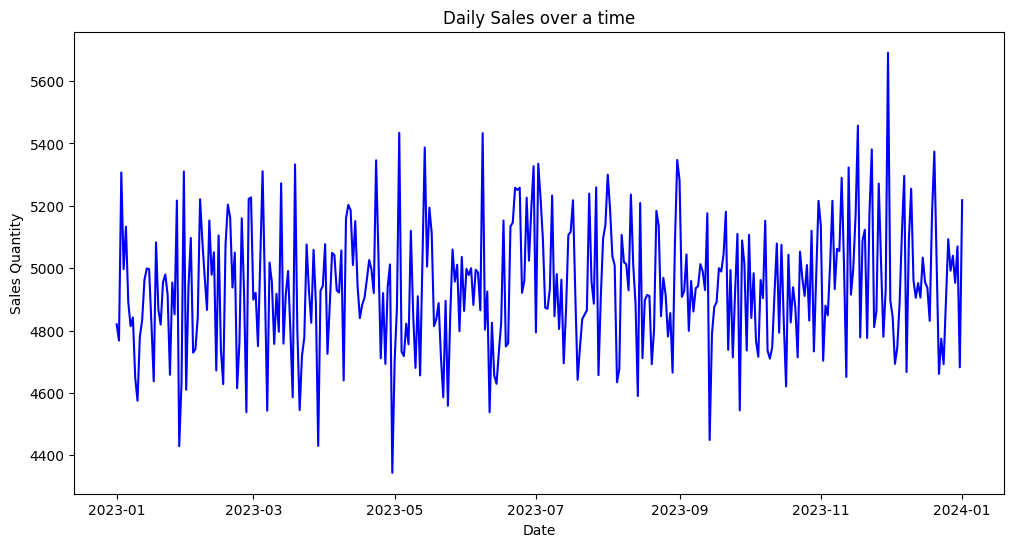

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df_grouped['Date'],df_grouped['Sales_Quantity'],label='ToTal Sales',color='blue')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Daily Sales over a time')

# **Split Data into Train and Test Sets (80-20%)**

In [11]:
train_size=int(len(df_grouped)*0.8)

In [12]:
train_size

292

In [13]:
#train: Contains the first train_size rows.#test: Contains the remaining rows.

In [14]:
train = df_grouped.iloc[:train_size]
test = df_grouped.iloc[train_size:]

In [15]:
train

,Date,Sales_Quantity
0,2023-01-01,4820
1,2023-01-02,4768
2,2023-01-03,5307
3,2023-01-04,4997
4,2023-01-05,5133
...,...,...
287,2023-10-15,5075
288,2023-10-16,4828
289,2023-10-17,4621
290,2023-10-18,5043


In [16]:
test

,Date,Sales_Quantity
292,2023-10-20,4939
293,2023-10-21,4873
294,2023-10-22,4714
295,2023-10-23,5053
296,2023-10-24,4968
...,...,...
361,2023-12-28,5040
362,2023-12-29,4953
363,2023-12-30,5070
364,2023-12-31,4682


In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#After splitting data into train and test sets:
print("Train set size:", len(train))
print("Test set size:", len(test))

Train set size: 292
Test set size: 74


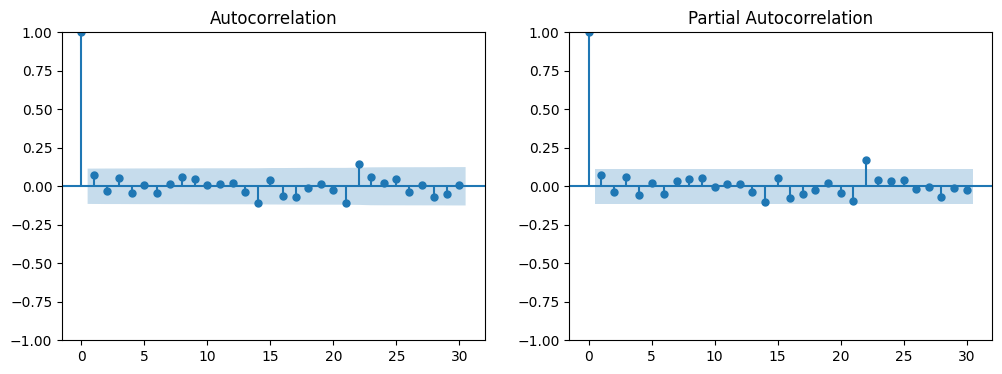

In [18]:
#Add the ACF and PACF plots:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(train['Sales_Quantity'], lags=30, ax=axes[0])
plot_pacf(train['Sales_Quantity'], lags=30, ax=axes[1])
plt.show()

# **Train ARIMA Model**

In [19]:
# Try order (1, 1, 2) (p,d,q)
arima_model=ARIMA(train['Sales_Quantity'],order=(5,1,5))

In [20]:
arima_model_fit=arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
#Evaluate ARIMA model

In [22]:
arima_pred=arima_model_fit.forecast(steps=len(test))

In [23]:
arima_pred

,predicted_mean
292,4960.756119
293,4937.524968
294,4876.410994
295,4991.325991
296,4875.245738
...,...
361,4971.705025
362,4871.493727
363,4981.336126
364,4897.218048


In [24]:
arima_mae=mean_absolute_error(test['Sales_Quantity'],arima_pred)

In [25]:
arima_mae

168.82372996136203

# **Train SARIMA Model**

In [26]:
sarima_model=SARIMAX(train['Sales_Quantity'],order=(1,1,1),seasonal_order=(1,1,1,7))

In [27]:
sarima_model

In [28]:
sarima_result=sarima_model.fit()

In [29]:
sarima_pred=sarima_result.forecast(steps=len(test))

In [30]:
sarima_pred

,predicted_mean
292,4964.925099
293,4935.989663
294,4933.757150
295,4962.177924
296,4935.799130
...,...
361,4952.731405
362,4979.103974
363,4951.492897
364,4937.281009


In [31]:
sarima_mae=mean_absolute_error(test['Sales_Quantity'],sarima_pred)

In [32]:
sarima_mae

162.42350366710238

# **Plot ARIMA & SARIMA Predictions**

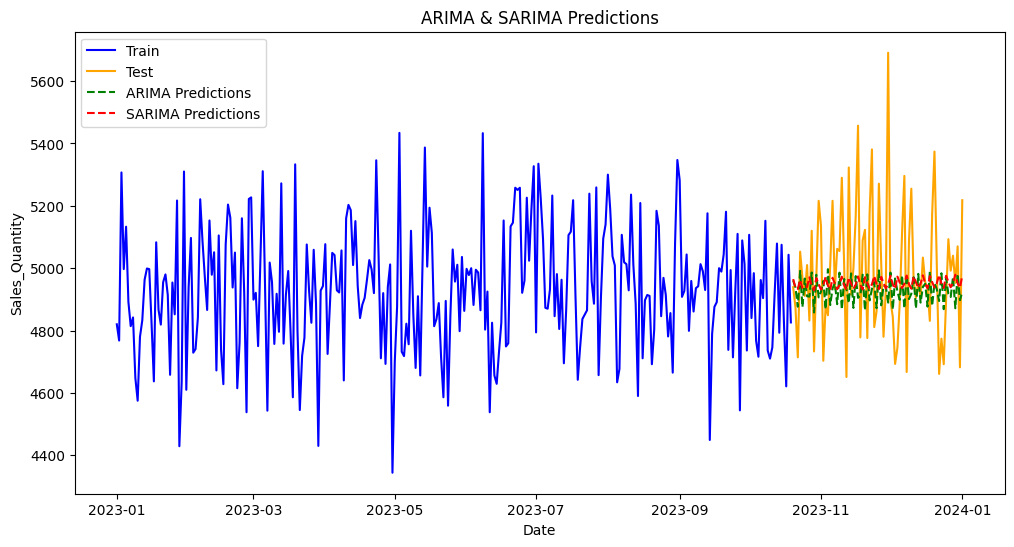

In [33]:
plt.figure(figsize=(12,6))
plt.plot(train['Date'],train['Sales_Quantity'],label='Train',color='blue')
plt.plot(test['Date'],test['Sales_Quantity'],label='Test',color='orange')
plt.plot(test['Date'],arima_pred,label='ARIMA Predictions',color='green',linestyle='dashed')
plt.plot(test['Date'],sarima_pred,label='SARIMA Predictions',color='red',linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales_Quantity')
plt.title('ARIMA & SARIMA Predictions')
plt.legend()
plt.show()

# **Evaluate Model Performance**

In [34]:
arima_mae=mean_absolute_error(test['Sales_Quantity'],arima_pred)
sarima_mae=mean_absolute_error(test['Sales_Quantity'],sarima_pred)

In [35]:
print(f'ARIMA Model MAE: {arima_mae:.2f}')
print(f'SARIMA Model MAE: {sarima_mae:.2f}')

ARIMA Model MAE: 168.82
SARIMA Model MAE: 162.42


In [47]:
# Calculate RMSE and R-squared for ARIMA
from sklearn.metrics import mean_squared_error, r2_score

arima_rmse = np.sqrt(mean_squared_error(test['Sales_Quantity'], arima_pred))
arima_r2 = r2_score(test['Sales_Quantity'], arima_pred)

sarima_rmse = np.sqrt(mean_squared_error(test['Sales_Quantity'], sarima_pred))
sarima_r2 = r2_score(test['Sales_Quantity'], sarima_pred)

# Print all metrics
print(f'ARIMA Model MAE: {arima_mae:.2f}')
print(f'ARIMA Model RMSE: {arima_rmse:.2f}')
print(f'ARIMA Model R-squared: {arima_r2:.2f}')

print(f'SARIMA Model MAE: {sarima_mae:.2f}')
print(f'SARIMA Model RMSE: {sarima_rmse:.2f}')
print(f'SARIMA Model R-squared: {sarima_r2:.2f}')



ARIMA Model MAE: 168.82
ARIMA Model RMSE: 222.63
ARIMA Model R-squared: -0.17
SARIMA Model MAE: 162.42
SARIMA Model RMSE: 209.83
SARIMA Model R-squared: -0.04


In [48]:
#Interpreting the Metrics:

#MAE (Mean Absolute Error): Measures the average absolute difference between the predicted and actual values. Lower MAE indicates better accuracy.
#RMSE (Root Mean Squared Error): Similar to MAE but penalizes larger errors more heavily. Lower RMSE is preferred.
#R-squared: Represents the proportion of variance in the dependent variable (sales quantity) explained by the model. Higher R-squared values indicate better model fit, with 1 being a perfect fit. Negative R-squared suggests that the model performs worse than a simple horizontal line (mean of the data).

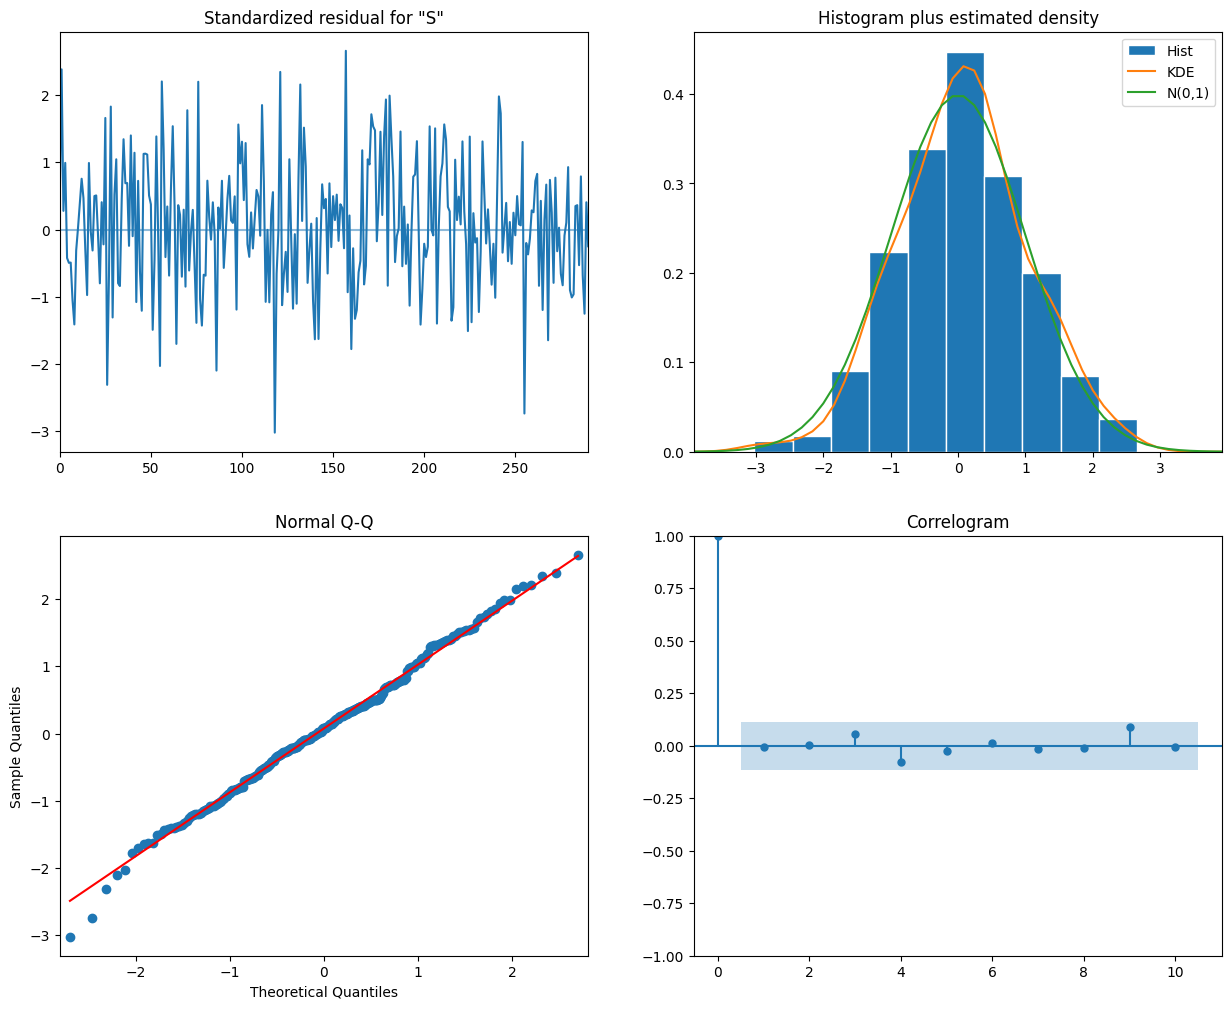

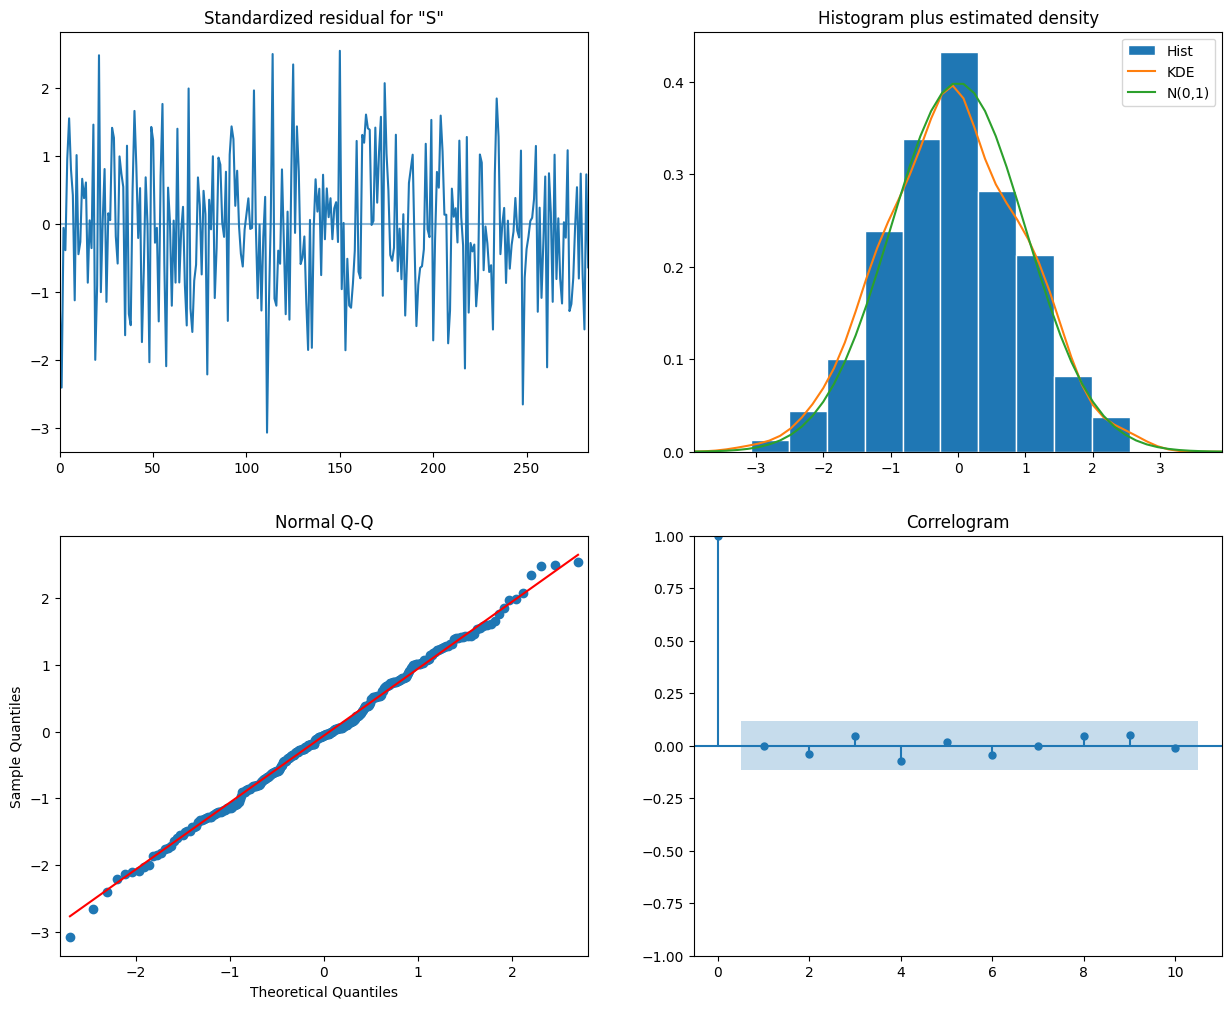

In [36]:
arima_model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

In [37]:
!pip install pmdarima
import pmdarima as pm

# Find the best order for ARIMA model
auto_arima_model = pm.auto_arima(train['Sales_Quantity'], max_p=5, max_d=2, max_q=5,
                                seasonal=False, stepwise=True, trace=True)
# Display the best order
print(auto_arima_model.order)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5796.786, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3926.574, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3927.030, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3926.909, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3929.056, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 3.853 seconds
(0, 0, 0)


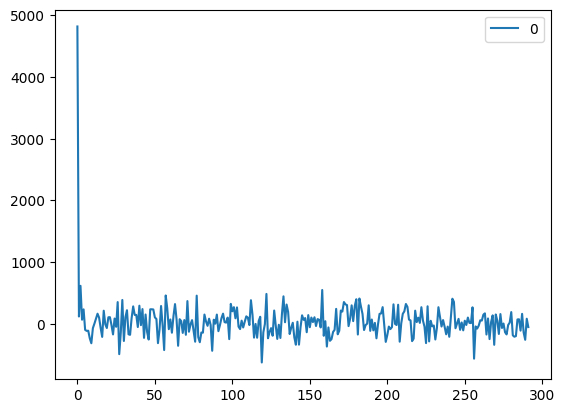

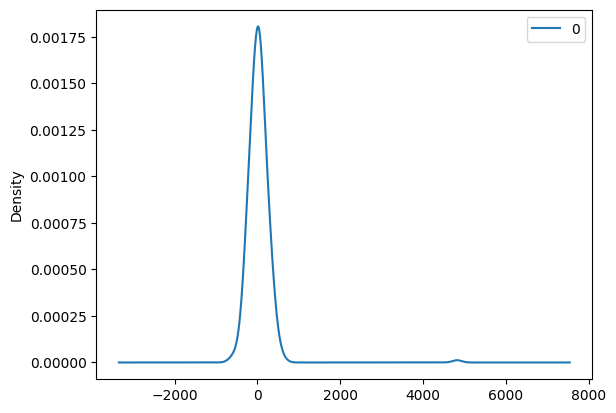

                 0
count   292.000000
mean     32.866686
std     344.120192
min    -625.447562
25%    -112.885668
50%      16.099957
75%     145.324373
max    4820.000000


In [38]:
arima_residuals = pd.DataFrame(arima_model_fit.resid)
arima_residuals.plot()
plt.show()
arima_residuals.plot(kind='kde')
plt.show()
print(arima_residuals.describe())

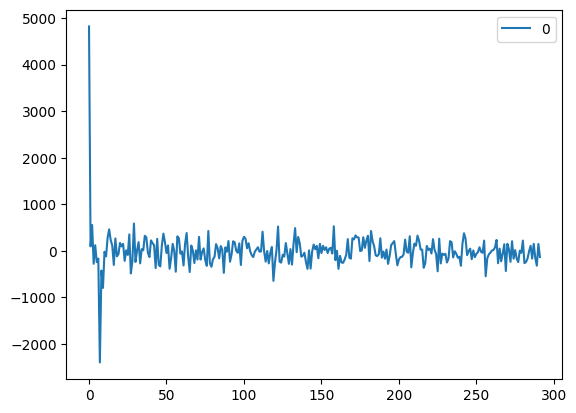

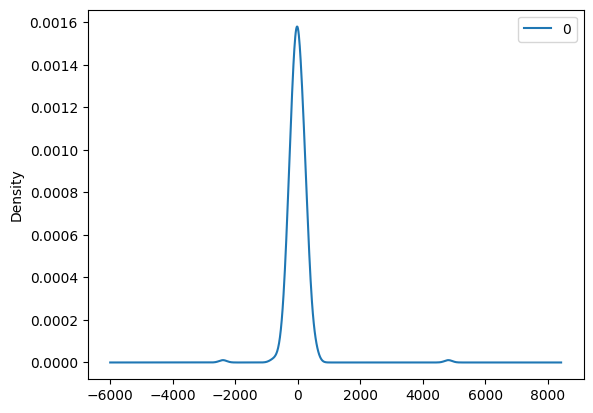

                 0
count   292.000000
mean     -3.867924
std     385.036179
min   -2396.132166
25%    -163.499556
50%     -12.511447
75%     150.632456
max    4820.000000


In [39]:
sarima_residuals = pd.DataFrame(sarima_result.resid)
sarima_residuals.plot()
plt.show()
sarima_residuals.plot(kind='kde')
plt.show()
print(sarima_residuals.describe())

In [40]:
df_weekly = df_grouped.resample('W', on='Date').sum().reset_index()
# 'W' represents weekly frequency
# 'on='Date'' specifies the column used for resampling
# 'sum()' aggregates daily sales to weekly totals

In [41]:
df_weekly.head()

,Date,Sales_Quantity
0,2023-01-01,4820
1,2023-01-08,34753
2,2023-01-15,33795
3,2023-01-22,34164
4,2023-01-29,33659


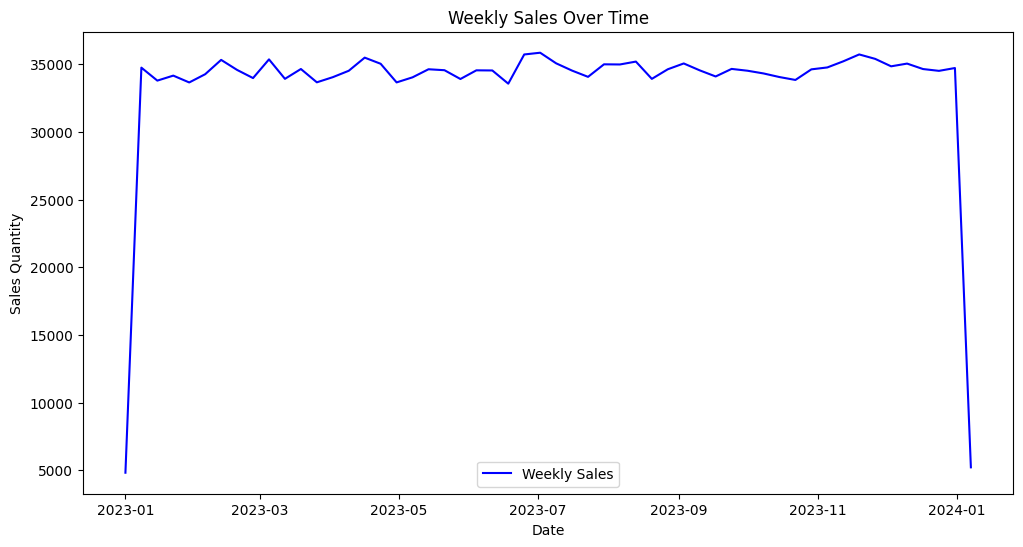

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df_weekly['Date'],df_weekly['Sales_Quantity'],label='Weekly Sales',color='blue')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Weekly Sales Over Time')
plt.legend()
plt.show()

In [45]:
specific_week_demand = df_weekly[df_weekly['Date'] == '2023-10-23']['Sales_Quantity']

# Check if the result is empty before accessing the value
if specific_week_demand.empty:
    print("Demand for the week of 2023-10-23 not found in the dataset.")
else:
    specific_week_demand = specific_week_demand.values[0]  # Access the value safely
    print(f"Demand for the week of 2023-10-23: {specific_week_demand}")

Demand for the week of 2023-10-23 not found in the dataset.


In [46]:
average_weekly_demand = df_weekly['Sales_Quantity'].mean()
std_weekly_demand = df_weekly['Sales_Quantity'].std()

print(f"Average Weekly Demand: {average_weekly_demand:.2f}")
print(f"Standard Deviation of Weekly Demand: {std_weekly_demand:.2f}")

Average Weekly Demand: 33489.78
Standard Deviation of Weekly Demand: 5664.89


In [59]:
model_metrics = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA'],
    'MAE': [arima_mae, sarima_mae],
    'RMSE': [arima_rmse, sarima_rmse],
    'R-squared': [arima_r2, sarima_r2]
})

# Accessing metrics:
print(model_metrics[model_metrics['Model'] == 'ARIMA']['MAE'])

0    168.82373
Name: MAE, dtype: float64


In [60]:
from tabulate import tabulate

# Using the dictionary approach:
print(tabulate(model_metrics, headers='keys', tablefmt='fancy_grid'))

# Using the DataFrame approach:
print(tabulate(model_metrics, headers='keys', tablefmt='fancy_grid'))

╒════╤═════════╤═════════╤═════════╤═════════════╕
│    │ Model   │     MAE │    RMSE │   R-squared │
╞════╪═════════╪═════════╪═════════╪═════════════╡
│  0 │ ARIMA   │ 168.824 │ 222.626 │  -0.168216  │
├────┼─────────┼─────────┼─────────┼─────────────┤
│  1 │ SARIMA  │ 162.424 │ 209.835 │  -0.0378253 │
╘════╧═════════╧═════════╧═════════╧═════════════╛
╒════╤═════════╤═════════╤═════════╤═════════════╕
│    │ Model   │     MAE │    RMSE │   R-squared │
╞════╪═════════╪═════════╪═════════╪═════════════╡
│  0 │ ARIMA   │ 168.824 │ 222.626 │  -0.168216  │
├────┼─────────┼─────────┼─────────┼─────────────┤
│  1 │ SARIMA  │ 162.424 │ 209.835 │  -0.0378253 │
╘════╧═════════╧═════════╧═════════╧═════════════╛


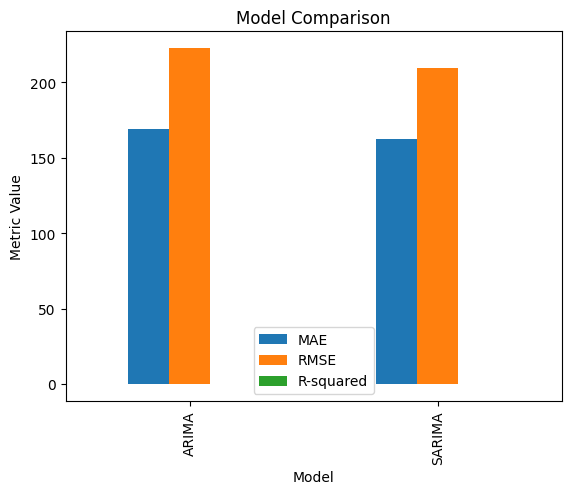

In [61]:
# Using the DataFrame approach:
model_metrics.plot(x='Model', y=['MAE', 'RMSE', 'R-squared'], kind='bar')
plt.title('Model Comparison')
plt.ylabel('Metric Value')
plt.show()

In [62]:
# Comparison:

## Based on the provided metrics:
"""
MAE: SARIMA has a lower MAE (162.42) compared to ARIMA (168.82),
suggesting that SARIMA's predictions are, on average, closer to the actual values.

RMSE: SARIMA also has a lower RMSE (209.83) than ARIMA (222.63),
further supporting its better performance in terms of reducing larger errors.

R_squared: Both models have negative R-squared values, which is not ideal.
However, SARIMA's R-squared (-0.04) is slightly better than ARIMA's (-0.17). This indicates that SARIMA explains a bit more variance in the data than ARIMA, although neither model provides a good fit.

# Conclusion:
Considering all three metrics, SARIMA appears to be a slightly better fit for your data compared to ARIMA.
It has lower MAE and RMSE, indicating better prediction accuracy, and a slightly better (though still negative) R-squared.

## Important Considerations:

Negative R_squared: The negative R-squared values suggest that both models are struggling to capture the underlying patterns in your data. This might indicate that the chosen model structures (ARIMA and SARIMA) are not the most suitable for your time series. You might consider exploring other forecasting methods, such as exponential smoothing or machine learning models, to see if they can provide a better fit.
Data Characteristics: Carefully analyze your time series data for features like trend, seasonality, and any potential outliers. This understanding can guide you in selecting more appropriate models and hyperparameters.
Domain Knowledge: Incorporate any relevant domain knowledge or insights you have about FMCG sales to improve your forecasting process. This might involve adding external features or adjusting model assumptions.
further supporting its better performance in terms of reducing larger errors.

R-squared: Both models have negative R-squared values, which is not ideal.
However, SARIMA's R-squared (-0.04) is slightly better than ARIMA's (-0.17). This indicates that SARIMA explains a bit more variance in the data than ARIMA, although neither model provides a good fit.

## Conclusion:
Considering all three metrics, SARIMA appears to be a slightly better fit for your data compared to ARIMA.
It has lower MAE and RMSE, indicating better prediction accuracy, and a slightly better (though still negative) R-squared.

## Important Considerations:

Negative R-squared: The negative R-squared values suggest that both models are struggling to capture the underlying patterns in your data. This might indicate that the chosen model structures (ARIMA and SARIMA) are not the most suitable for your time series. You might consider exploring other forecasting methods, such as exponential smoothing or machine learning models, to see if they can provide a better fit.
Data Characteristics: Carefully analyze your time series data for features like trend, seasonality, and any potential outliers. This understanding can guide you in selecting more appropriate models and hyperparameters.
Domain Knowledge: Incorporate any relevant domain knowledge or insights you have about FMCG sales to improve your forecasting process. This might involve adding external features or adjusting model assumptions.

"""

"\nMAE: SARIMA has a lower MAE (162.42) compared to ARIMA (168.82), \nsuggesting that SARIMA's predictions are, on average, closer to the actual values.\n\nRMSE: SARIMA also has a lower RMSE (209.83) than ARIMA (222.63),\nfurther supporting its better performance in terms of reducing larger errors.\n\nR_squared: Both models have negative R-squared values, which is not ideal. \nHowever, SARIMA's R-squared (-0.04) is slightly better than ARIMA's (-0.17). This indicates that SARIMA explains a bit more variance in the data than ARIMA, although neither model provides a good fit.\n\n# Conclusion:\nConsidering all three metrics, SARIMA appears to be a slightly better fit for your data compared to ARIMA. \nIt has lower MAE and RMSE, indicating better prediction accuracy, and a slightly better (though still negative) R-squared.\n\n## Important Considerations:\n\nNegative R_squared: The negative R-squared values suggest that both models are struggling to capture the underlying patterns in your d